# In this project I am going to compare the performance of Linear regression and Deep Learning algorithms in predicting the sale price.

In [ ]:
# predicting sale price with deep learning
from google.colab import drive
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/grive/MyDrive/Colab Notebooks/diamonds.csv')

In [ ]:
df.head()
df = df.drop(['Unnamed: 6','carat.1', 'Predicted price'], axis =1)

In [ ]:
df.describe()

,carat,cut_ord,clarity_ord,price
count,53000.000000,50000.000000,50000.000000,50000.000000
mean,0.798418,3.903980,4.126700,3939.103500
std,0.474718,1.117043,1.665564,3995.879832
min,0.200000,1.000000,1.000000,326.000000
25%,0.400000,3.000000,3.000000,948.000000
50%,0.700000,4.000000,4.000000,2402.500000
75%,1.040000,5.000000,5.000000,5331.000000
max,5.010000,5.000000,8.000000,18823.000000


In [ ]:
df.var()

carat          2.253525e-01
cut_ord        1.247854e+00
clarity_ord    2.773755e+00
price          1.596700e+07
dtype: float64

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np

df['carat'] = df['carat'].astype(np.float32)
df['cut_ord'] = df['cut_ord'].astype(np.float32)
df['clarity_ord'] = df['clarity_ord'].astype(np.float32)
df['price'] = df['price'].astype(np.float32)

In [ ]:
df = df.loc[0:49999:, ['carat', 'cut_ord', 'clarity_ord', 'price']]

In [ ]:
# Print the number of NaNs
df.isnull().sum()

carat          0
cut_ord        0
clarity_ord    0
price          0
dtype: int64

In [ ]:
predictors = df.drop('price', axis = 1)
predictors = np.array(predictors)

In [ ]:
target = df.price
target = np.array(target)

In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.30, random_state= 42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(predictors_train, target_train)

# Predict on the test data: y_pred
target_pred = reg_all.predict(predictors_test)


# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(predictors_test, target_test)))

rmse = np.sqrt(mean_squared_error(target_test, target_pred))

print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8849230974944802
Root Mean Squared Error: 1328.0048828125


In [ ]:
>>> print('intercept:', reg_all.intercept_)

>>> print('slope:', reg_all.coef_)


intercept: -5239.331
slope: [8387.326    154.32529  456.85684]


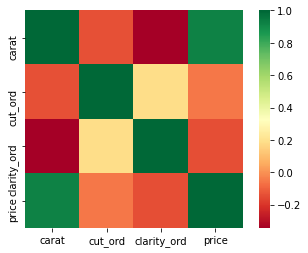

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [ ]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
import pandas as pd
import numpy as np


# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

input_shape

(3,)

In [ ]:
# Specify the model
model = Sequential()

model.add(Dense(128, activation='relu', input_shape = input_shape,))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 9         
Total params: 11,121
Trainable params: 11,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Create training and test sets
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.30, random_state= 42)

In [ ]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_loss = EarlyStopping(monitor = 'val_loss', patience = 5)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_diamonds_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(predictors_train, target_train,
                    epochs = 1000,
                    callbacks = [monitor_val_loss, modelCheckpoint],
                    validation_data = (predictors_test, target_test))

Epoch 1/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 10709778.0000 - val_loss: 2430042.7500
Epoch 2/1000
1094/1094 [==============================] - 2s 2ms/step - loss: 1887253.1250 - val_loss: 1490317.2500
Epoch 3/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 1494589.7500 - val_loss: 1364199.3750
Epoch 4/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 1420028.3750 - val_loss: 1295448.1250
Epoch 5/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 1374345.2500 - val_loss: 1255556.0000
Epoch 6/1000
1094/1094 [==============================] - 3s 3ms/step - loss: 1340681.0000 - val_loss: 1227624.6250
Epoch 7/1000
1094/1094 [==============================] - 3s 3ms/step - loss: 1313874.0000 - val_loss: 1212159.5000
Epoch 8/1000
1094/1094 [==============================] - 3s 3ms/step - loss: 1301040.8750 - val_loss: 1215477.0000
Epoch 9/1000
1094/1094 [==============================] - 3s 3ms/step -

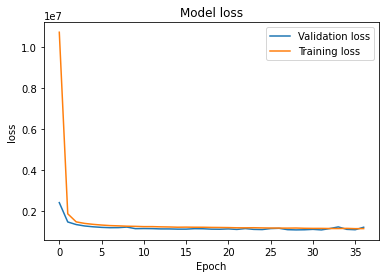

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(h_callback.history['val_loss'], label = 'Validation loss')
plt.plot(h_callback.history['loss'], label= 'Training loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:

from keras.models import load_model

my_model = load_model('best_diamonds_model.hdf5')

In [ ]:
preds = my_model.predict(predictors_test)
preds

array([[5446.1655],
       [2826.0103],
       [1338.661 ],
       ...,
       [ 570.9213],
       [1602.3684],
       [ 702.5221]], dtype=float32)

In [ ]:
target_test

array([6884., 3212., 1424., ...,  696., 1224.,  723.], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

from math import sqrt



mse = mean_squared_error(target_test, preds)


rmse = sqrt(mse)

print('RMSE: %f' % rmse)

RMSE: 1050.688405


Deep learning algorithm with some optimization results in 20,8 % better performance than Linear Regression. 


In [ ]:
from keras.layers import BatchNormalization


# Specify the model
model_b = Sequential()

model_b.add(Dense(128, activation='relu', input_shape = input_shape,))
model_b.add(Dense(64, activation='relu'))
model_b.add(Dense(32, activation='relu'))
model_b.add(Dense(8, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(Dense(1))

In [ ]:
model_b.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 264       
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 11,153
Trainable params: 11,137
Non-trainable params: 16
_________________________________________________

In [ ]:
# Create training and test sets
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.30, random_state= 42)

In [ ]:
# Compile the model
model_b.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_loss = EarlyStopping(monitor = 'val_loss', patience = 5)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_diamonds_model_b.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model_b.fit(predictors_train, target_train,
                    epochs = 1000,
                    callbacks = [monitor_val_loss, modelCheckpoint],
                    validation_data = (predictors_test, target_test))

Epoch 1/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 1522880.6250 - val_loss: 973665.0625
Epoch 2/1000
1094/1094 [==============================] - 3s 3ms/step - loss: 1589228.3750 - val_loss: 973149.3750
Epoch 3/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 1595800.0000 - val_loss: 995706.2500
Epoch 4/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 1550274.7500 - val_loss: 978770.0625
Epoch 5/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 1559606.6250 - val_loss: 1026182.9375
Epoch 6/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 1567399.2500 - val_loss: 1020329.7500
Epoch 7/1000
1094/1094 [==============================] - 3s 3ms/step - loss: 1587444.2500 - val_loss: 969407.1250
Epoch 8/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 1509472.0000 - val_loss: 996795.3125
Epoch 9/1000
1094/1094 [==============================] - 3s 2ms/step - loss: 

In [ ]:
from keras.models import load_model

my_model2 = load_model('best_diamonds_model_b.hdf5')

In [ ]:
preds = my_model2.predict(predictors_test)
preds

array([[5598.6406 ],
       [2985.1406 ],
       [1491.3794 ],
       ...,
       [ 459.32642],
       [1811.3462 ],
       [ 743.5115 ]], dtype=float32)

In [ ]:
target_test

array([6884., 3212., 1424., ...,  696., 1224.,  723.], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

from math import sqrt



mse = mean_squared_error(target_test, preds)


rmse = sqrt(mse)

print('RMSE: %f' % rmse)

RMSE: 984.585033


# Deep learning with batch optimization performs even better with 25,8 % performance increase than the Linear regression.

## RMSE with Linear Rehression, 1328
## RMSE with Deep Learning, 1050.68
## RMSE with Deep Learning and Batch Normalization, 984.58 